In [233]:
import pandas as pd

In [234]:
from sklearn.preprocessing import LabelEncoder

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
from sklearn.impute import SimpleImputer

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [239]:
import matplotlib.pyplot as plt

In [240]:
import seaborn as sns

In [241]:
data = pd.read_csv('loan_prediction.csv')

In [242]:
data.columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [243]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [244]:
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

In [245]:
label_encoder =  {}
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoder[col] = le

In [246]:
x = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [248]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [249]:
y_pred = model.predict(x_test)

In [250]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [251]:
print('Accuracy:', accuracy)
print('classification Report:\n', report)

Accuracy: 0.7967479674796748
classification Report:
               precision    recall  f1-score   support

           0       0.80      0.43      0.56        37
           1       0.80      0.95      0.87        86

    accuracy                           0.80       123
   macro avg       0.80      0.69      0.71       123
weighted avg       0.80      0.80      0.78       123



In [252]:
conf_matrix = confusion_matrix(y_test, y_pred)

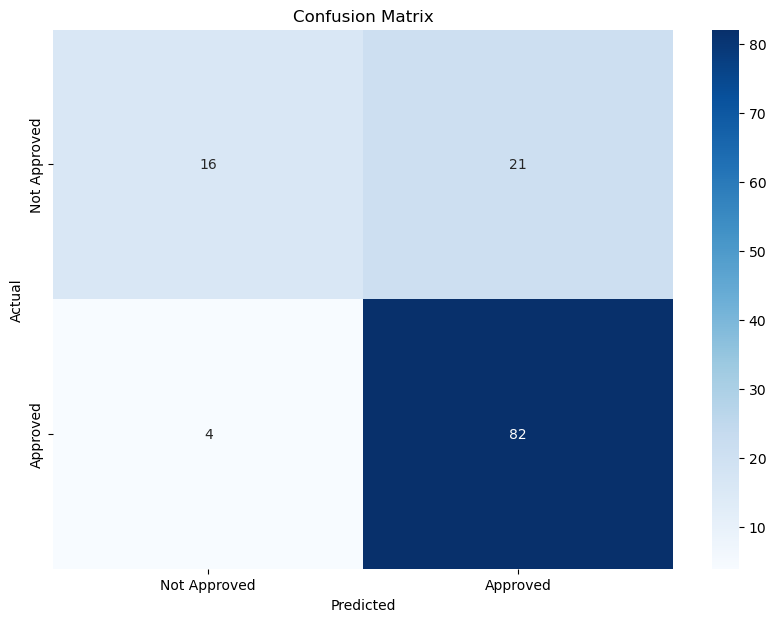

In [253]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [254]:
feature_importances = model.feature_importances_
features = x.columns
indices = feature_importances.argsort()

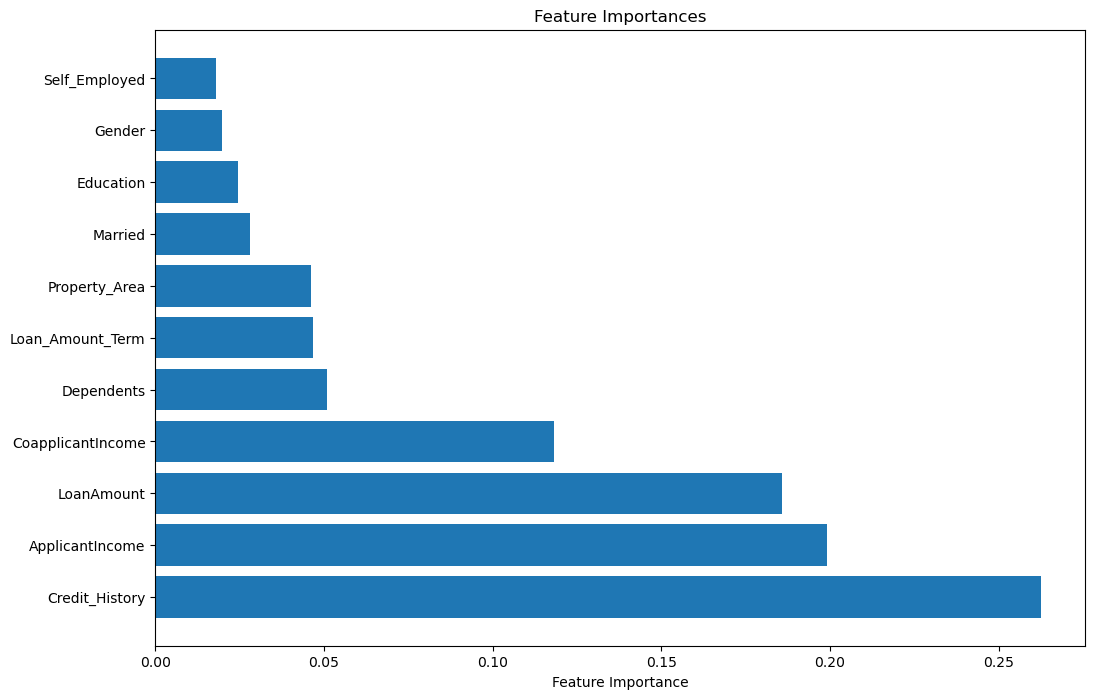

In [255]:
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()